In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import copy
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import cmocean as cmo
import matplotlib.pyplot as plt

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

cwd=os.getcwd()

In [2]:
exp_list=['GLS5','eqdisc29','eqdisc31','GLS5','r6_cycle1_MLE1_zgrid']

mld_list=['MLD_003', 'MLD_EN1']
method_list=['max','min']

for EXP in exp_list:
    for METHOD in method_list:
        for MLDVAR in mld_list:
            case='mod_'+EXP+'_'+MLDVAR+'_'+METHOD
            print(case)
            vars()[case]= np.load('data_GLS_MLE_EQDISC_v0_v0h/'+case+'_03-17.npy',allow_pickle='TRUE').item()

x, y = mod_GLS5_MLD_003_max['lon'], mod_GLS5_MLD_003_max['lat']
lon,lat=np.meshgrid(x,y)

mod_GLS5_MLD_003_max
mod_GLS5_MLD_EN1_max
mod_GLS5_MLD_003_min
mod_GLS5_MLD_EN1_min
mod_eqdisc29_MLD_003_max
mod_eqdisc29_MLD_EN1_max
mod_eqdisc29_MLD_003_min
mod_eqdisc29_MLD_EN1_min
mod_eqdisc31_MLD_003_max
mod_eqdisc31_MLD_EN1_max
mod_eqdisc31_MLD_003_min
mod_eqdisc31_MLD_EN1_min
mod_GLS5_MLD_003_max
mod_GLS5_MLD_EN1_max
mod_GLS5_MLD_003_min
mod_GLS5_MLD_EN1_min
mod_r6_cycle1_MLE1_zgrid_MLD_003_max
mod_r6_cycle1_MLE1_zgrid_MLD_EN1_max
mod_r6_cycle1_MLE1_zgrid_MLD_003_min
mod_r6_cycle1_MLE1_zgrid_MLD_EN1_min


In [3]:
def plot_mlds_axes(mod_e, mod_n , mod_eq1, mod_eq2, obs, case, mld_criterion):
    # mod_e = model ePBL
    # mod_n = model ePBL_NN
    # obs = ARGO data
    # case = summer or winter
    # mld_criterion = PE or DE, where PE stands for potential anomaly and DE stands for 0.03 kg/m3 MLD criterion
    
    if case == 'summer':
        vmin1 = 0;   vmax1 = 80
        vmin2 = -10; vmax2 = 10
        if mld_criterion == 'DE':
            vmin3 = -20; vmax3 = 20
        elif mld_criterion == 'PE':
            vmin3 = -10; vmax3 = 10
        else:
            print('check code')
    elif case == 'winter':
        vmin1 = 0;   vmax1 = 300
        vmin2 = -20; vmax2 = 20
        if mld_criterion == 'DE':
            vmin3 = -100; vmax3 = 100
        elif mld_criterion == 'PE':
            vmin3 = -40;  vmax3 = 40
        else:
            print('check code')
        
    fig = plt.figure(figsize=(15, 15), layout='constrained')
    plt.rcParams['font.size'] = 12

    # Create a gridspec with 4 rows and 3 columns (the third column is for the extra subplot)
    gs = fig.add_gridspec(4, 3, width_ratios=[1, 1, 0.3])
    
    # Variables to store the mappable objects for the desired colorbars
    pcm_a = None  # from subplot (a) ePBL
    pcm_b = None  # from subplot (b) ePBL_NN(GLS) - ePBL
    pcm_f = None  # from subplot (f) ePBL_NN(GLS) - ARGO

    # Loop over the eight subplots (in the left two columns)
    for idx in range(8):
        i = idx + 1  # using 1-based indexing for clarity
        ax = fig.add_subplot(gs[(i-1) // 2, (i-1) % 2],
                             projection=ccrs.Robinson(central_longitude=-60))
        ax.add_feature(cfeature.LAND, color='gray')
        gl = ax.gridlines(draw_labels=True, linewidth=0.01, alpha=0.0, linestyle='--')
        
        gl.top_labels = False
        gl.right_labels = False

        


        if i == 1:
            gl.bottom_labels = False

            data = mod_e  # load the data to be plotted
            cmap = plt.cm.BuPu
            pcm = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                                cmap=cmap, vmin=vmin1, vmax=vmax1, rasterized=True)
            ax.set_title('(a) ePBL')
            # gl.labels_top = False
            # gl.ylabels_right = False
            pcm_a = pcm  # store for the colorbar later

        elif i == 2:
            gl.bottom_labels = False
            gl.left_labels = False
            data = mod_n - mod_e  # load the data to be plotted
            rmse = np.around(np.sqrt(np.nanmean(data**2)), 2)
            cmap = plt.cm.RdYlBu
            pcm = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                                cmap=cmap, vmin=vmin2, vmax=vmax2, rasterized=True)
            ax.set_title('(b) ePBL_NN(GLS) - ePBL, RMSD=' + str(rmse) + ' (m)')
            pcm_b = pcm  # store for the colorbar later

        elif i == 3:
            gl.bottom_labels = False
            data = mod_eq1 - mod_n  # load the data to be plotted
            rmse = np.around(np.sqrt(np.nanmean(data**2)), 2)
            cmap = plt.cm.RdYlBu
            ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                          cmap=cmap, vmin=vmin2, vmax=vmax2, rasterized=True)
            ax.set_title('(c) ePBL_EQ(w/o h) - ePBL_NN(GLS), RMSD=' + str(rmse) + ' (m)')

        elif i == 4:
            gl.bottom_labels = False
            gl.left_labels = False
            data = mod_eq2 - mod_n  # load the data to be plotted
            rmse = np.around(np.sqrt(np.nanmean(data**2)), 2)
            cmap = plt.cm.RdYlBu
            ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                          cmap=cmap, vmin=vmin2, vmax=vmax2, rasterized=True)
            ax.set_title('(d) ePBL_EQ(with h) - ePBL_NN(GLS), RMSD=' + str(rmse) + ' (m)')

        elif i == 5:
            gl.bottom_labels = False
            data = mod_e - obs  # load the data to be plotted
            rmse = np.around(np.sqrt(np.nanmean(data**2)), 2)
            cmap = plt.cm.PuOr
            ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                          cmap=cmap, vmin=vmin3, vmax=vmax3, rasterized=True)
            ax.set_title('(e) ePBL - ARGO, RMSE=' + str(rmse) + ' (m)')

        elif i == 6:
            gl.bottom_labels = False
            gl.left_labels = False
            data = mod_n - obs  # load the data to be plotted
            rmse = np.around(np.sqrt(np.nanmean(data**2)), 2)
            cmap = plt.cm.PuOr
            pcm = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                                cmap=cmap, vmin=vmin3, vmax=vmax3, rasterized=True)
            ax.set_title('(f) ePBL_NN(GLS) - ARGO, RMSD=' + str(rmse) + ' (m)')
            pcm_f = pcm  # store for the colorbar later

        elif i == 7:
            
            data = mod_eq1 - obs  # load the data to be plotted
            rmse = np.around(np.sqrt(np.nanmean(data**2)), 2)
            cmap = plt.cm.PuOr
            ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                          cmap=cmap, vmin=vmin3, vmax=vmax3, rasterized=True)
            ax.set_title('(g) ePBL_EQ(w/o h) - ARGO, RMSE=' + str(rmse) + ' (m)')

        elif i == 8:
            gl.left_labels = False
            data = mod_eq2 - obs  # load the data to be plotted
            rmse = np.around(np.sqrt(np.nanmean(data**2)), 2)
            cmap = plt.cm.PuOr
            ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                          cmap=cmap, vmin=vmin3, vmax=vmax3, rasterized=True)
            ax.set_title('(h) ePBL_EQ(with h) - ARGO, RMSE=' + str(rmse) + ' (m)')

        ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
        ax.set_global()

    # Add three horizontal colorbars below the left two-column subplots.
    # These axes are defined in normalized figure coordinates.
    # Adjust the positions as needed.
    cbar_ax_a = fig.add_axes([0.01, 0.0, 0.20, 0.015])
    cbar_ax_b = fig.add_axes([0.3, 0.0, 0.20, 0.015])
    cbar_ax_f = fig.add_axes([0.59, 0.0, 0.20, 0.015])
    
    cbar1 = fig.colorbar(pcm_a, cax=cbar_ax_a, orientation='horizontal', extend='max')
    cbar1.set_label('metres')
    
    cbar2 = fig.colorbar(pcm_b, cax=cbar_ax_b, orientation='horizontal', extend='both')
    cbar2.set_label('metres')
    
    cbar3 = fig.colorbar(pcm_f, cax=cbar_ax_f, orientation='horizontal', extend='both')
    cbar3.set_label('metres')
    
    # Additional subplot spanning the entire height remains unchanged.
    ax_extra = fig.add_subplot(gs[:, 2])
    data = mod_e - obs
    print(data.shape)
    
    rm_e = np.zeros(70)
    for i in range(70):
        N = np.nansum(data[i, :] / data[i, :])
        rm_e[i] = np.sqrt(np.nansum(data[i, :]**2) / N)
        
    data = mod_n - obs
    rm_n = np.zeros(70)
    for i in range(70):
        N = np.nansum(data[i, :] / data[i, :])
        rm_n[i] = np.sqrt(np.nansum(data[i, :]**2) / N)
        
    data = mod_eq1 - obs
    rm_eq = np.zeros(70)
    for i in range(70):
        N = np.nansum(data[i, :] / data[i, :])
        rm_eq[i] = np.sqrt(np.nansum(data[i, :]**2) / N)
        
    data = mod_eq2 - obs
    rm_eqh = np.zeros(70)
    for i in range(70):
        N = np.nansum(data[i, :] / data[i, :])
        rm_eqh[i] = np.sqrt(np.nansum(data[i, :]**2) / N)
    ax_extra.plot([], [], ' ', label="Model - ARGO")
    ax_extra.plot(rm_e, lat[:, 6], linestyle='-', color='black', label='ePBL')  #label='e' )#'ePBL - ARGO')
    ax_extra.plot(rm_n, lat[:, 6], linestyle='--', color='black', label='ePBL_NN(GLS)') #label='f' )#'ePBL_NN(GLS) - ARGO')
    ax_extra.plot(rm_eq, lat[:, 6], linestyle=':', color='black', label='ePBL_EQ(w/o h)') #label='g' )#'ePBL_EQ(w/o h) - ARGO')
    ax_extra.plot(rm_eqh, lat[:, 6], linestyle='-.', color='black', label='ePBL_EQ(with h)')  #label='h')# 'ePBL_EQ(with h) - ARGO')
    ax_extra.set_ylabel('Latitude',fontsize=15)
    ax_extra.set_xlabel('RMSE, meters')
    ax_extra.set_title('MLD bias')
    ax_extra.legend(bbox_to_anchor=(0.15, 0.8), loc='upper left',fontsize=9, frameon=False)
    
    if case == 'summer':
        fig.suptitle('Summer Mixed Layer Depths, 2003-2017 averaged')
    elif case == 'winter':
        fig.suptitle('Winter Mixed Layer Depths, 2003-2017 averaged')
        
    return fig

(70, 180)


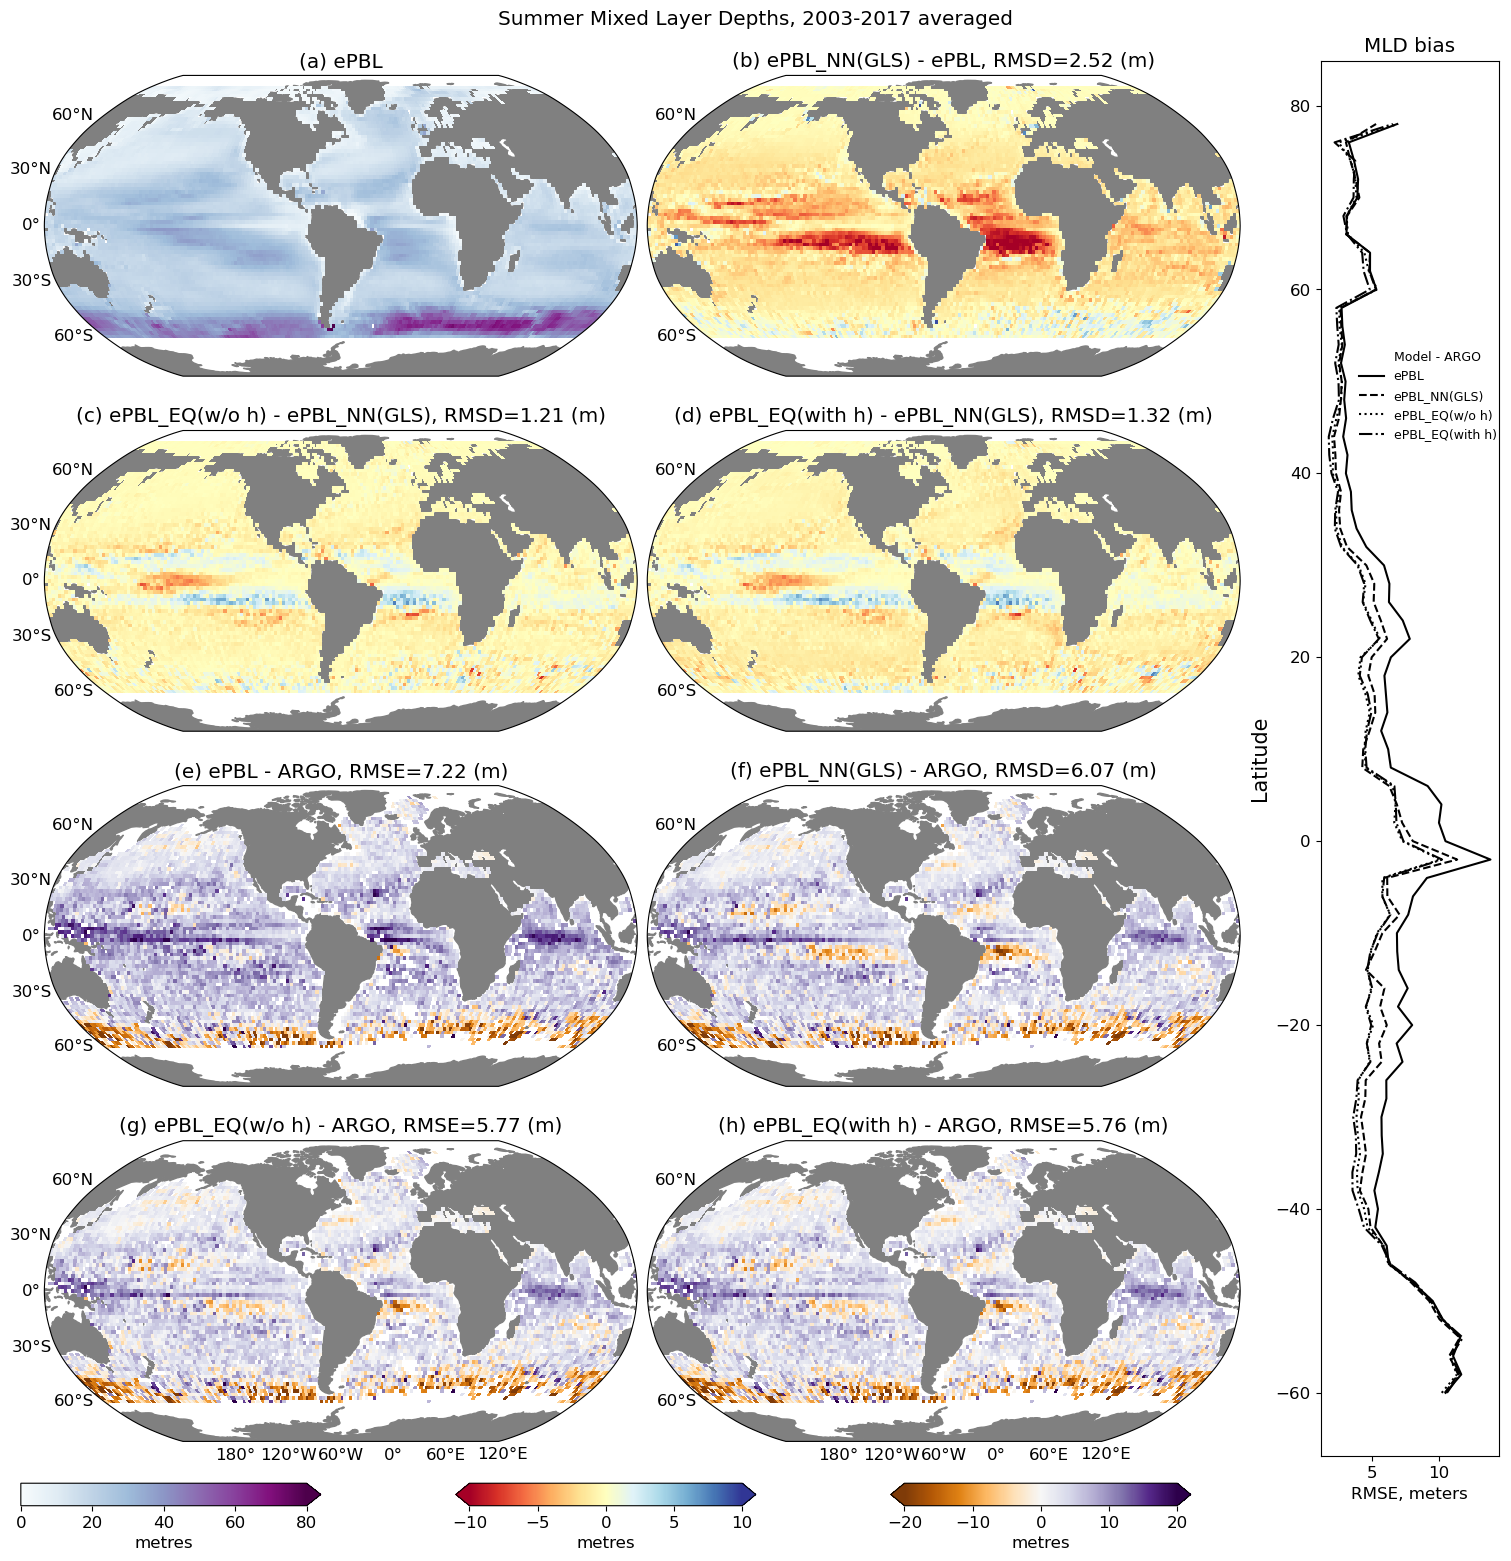

In [4]:
mod_e = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_003_min['mld']).T
mod_n = np.array(mod_GLS5_MLD_003_min['mld']).T
mod_eq1 = np.array(mod_eqdisc29_MLD_003_min['mld']).T # without h as input
mod_eq2 = np.array(mod_eqdisc31_MLD_003_min['mld']).T # without h as input
obs   = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_003_min['obs']).T

fig1=plot_mlds_axes(mod_e, mod_n , mod_eq1, mod_eq2, obs, 'summer', 'DE')

(70, 180)


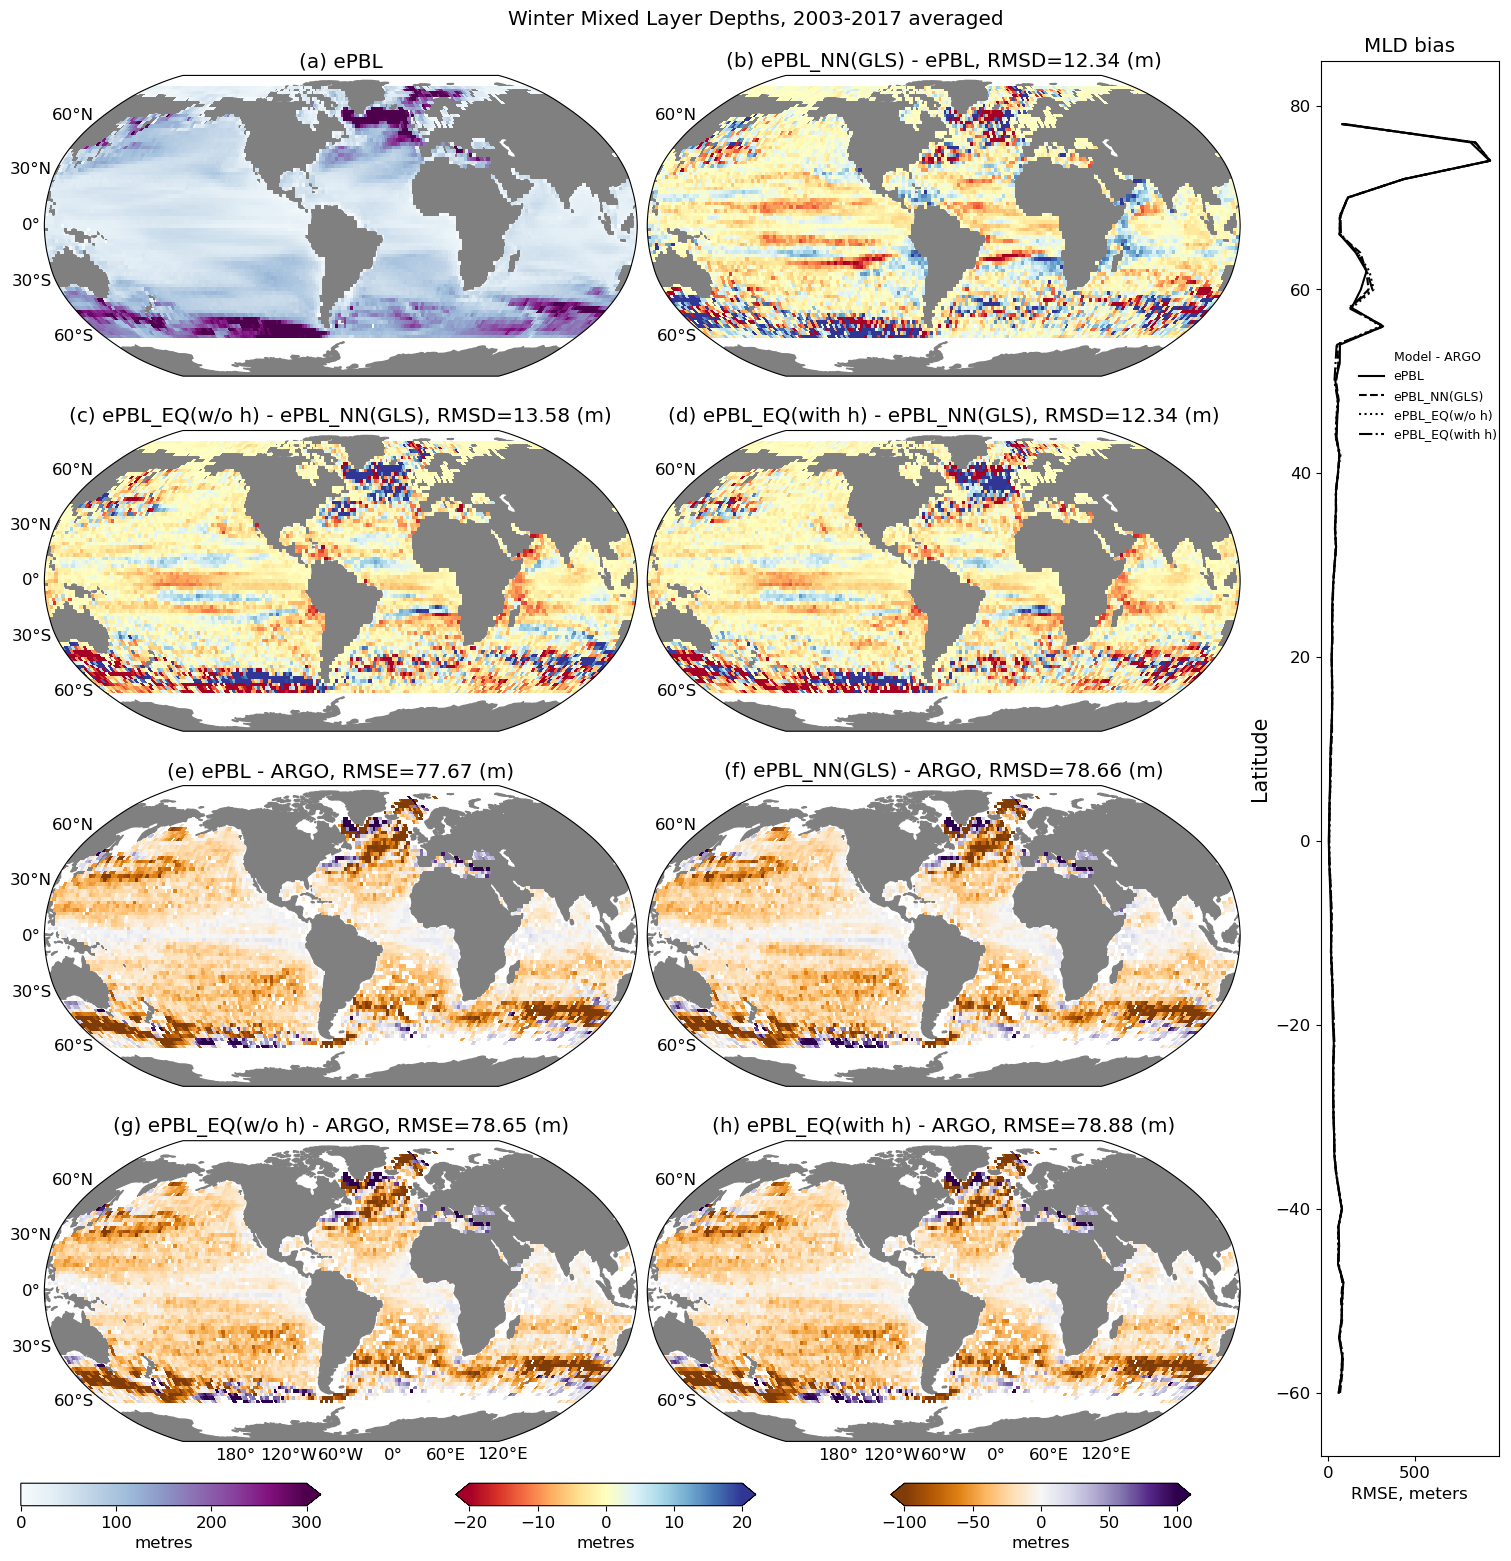

In [5]:
mod_e = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_003_max['mld']).T

mod_n = np.array(mod_GLS5_MLD_003_max['mld']).T

mod_eq1 = np.array(mod_eqdisc29_MLD_003_max['mld']).T # without h as input

mod_eq2 = np.array(mod_eqdisc31_MLD_003_max['mld']).T # without h as input

obs   = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_003_max['obs']).T

fig1=plot_mlds_axes(mod_e, mod_n , mod_eq1, mod_eq2, obs, 'winter', 'DE')


(70, 180)


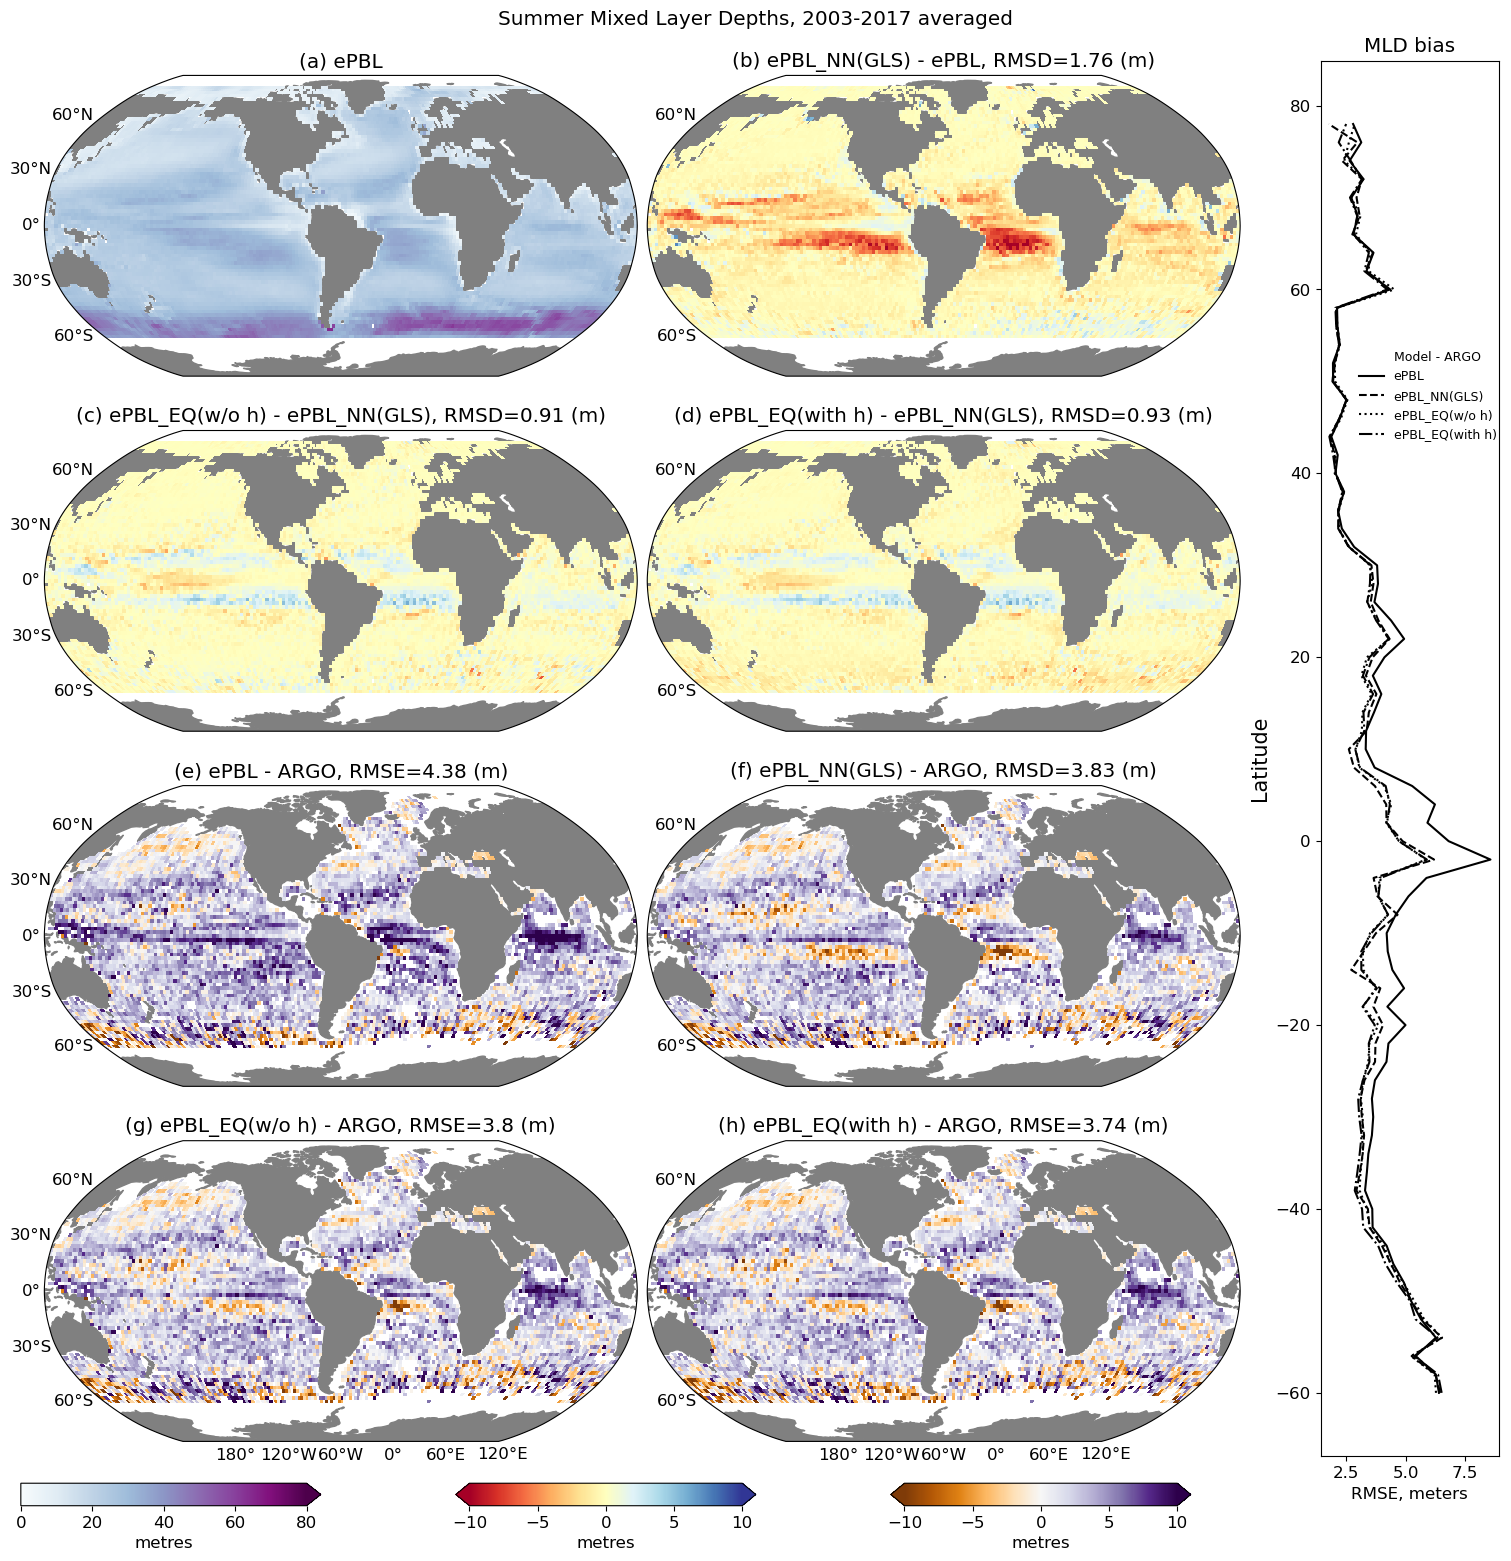

In [6]:
mod_e = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_EN1_min['mld']).T
mod_n = np.array(mod_GLS5_MLD_EN1_min['mld']).T
mod_eq1 = np.array(mod_eqdisc29_MLD_EN1_min['mld']).T # without h as input
mod_eq2 = np.array(mod_eqdisc31_MLD_EN1_min['mld']).T # without h as input
obs   = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_EN1_min['obs']).T

fig1=plot_mlds_axes(mod_e, mod_n , mod_eq1, mod_eq2, obs, 'summer', 'PE')


(70, 180)


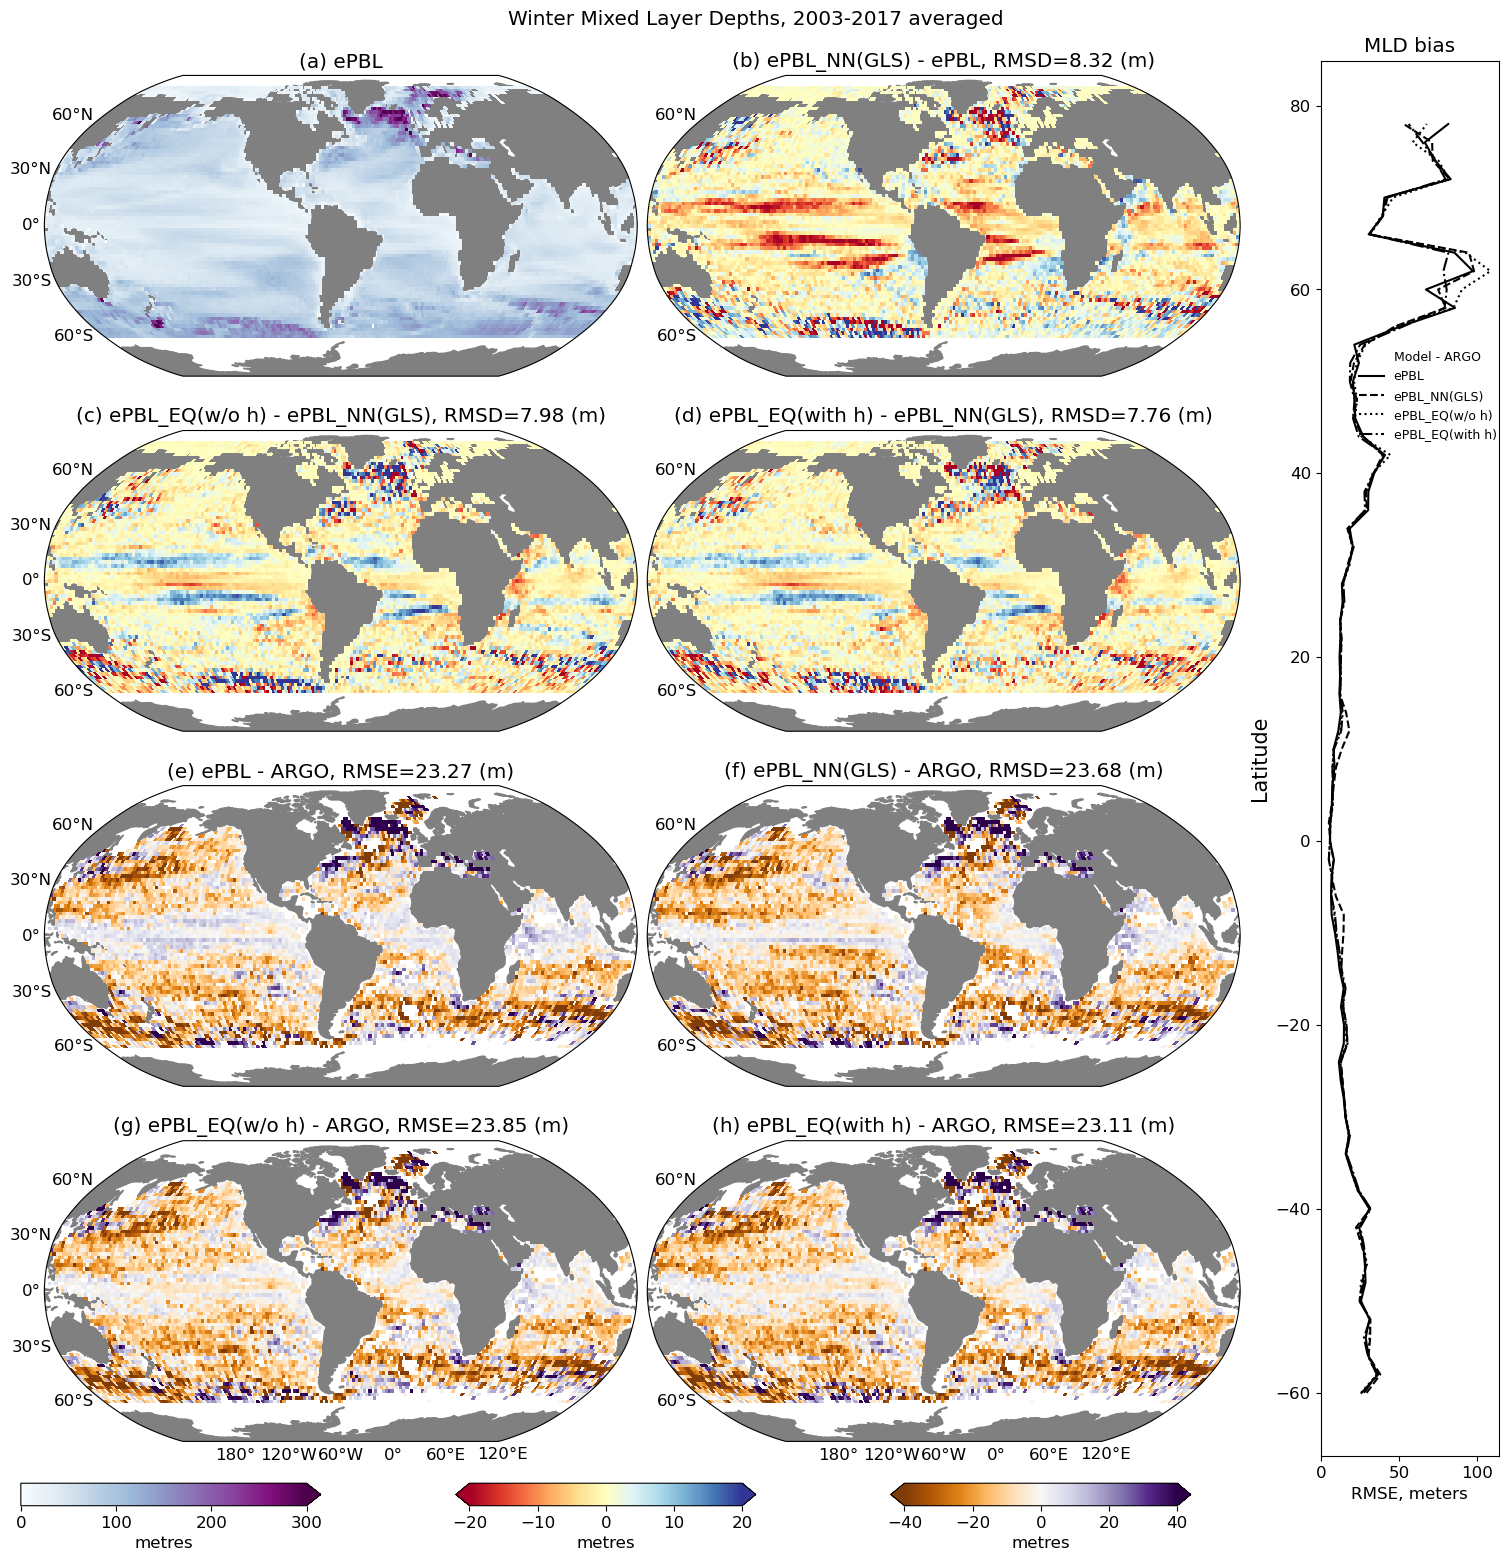

In [7]:
mod_e = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_EN1_max['mld']).T
mod_n = np.array(mod_GLS5_MLD_EN1_max['mld']).T
mod_eq1 = np.array(mod_eqdisc29_MLD_EN1_max['mld']).T # without h as input
mod_eq2 = np.array(mod_eqdisc31_MLD_EN1_max['mld']).T # without h as input
obs   = np.array(mod_r6_cycle1_MLE1_zgrid_MLD_EN1_max['obs']).T

fig1=plot_mlds_axes(mod_e, mod_n , mod_eq1, mod_eq2, obs, 'winter', 'PE')